In [3]:
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

#tell sympy to render all output using LaTeX

from sympy import init_printing
init_printing()

def linearconv(nx):
    dx = 2/(nx-1)
    nt = 20
    #nt = 10
    c = 1
    sigma = .5
    x = numpy.linspace(0,2,nx)
    
    dt = sigma*dx
    #dt = .02
    
    u = numpy.ones(nx)
    lbound = numpy.where(x >= 0.5)
    ubound = numpy.where(x <= 1)
    u[numpy.intersect1d(lbound, ubound)] = 2
    
    un = numpy.ones(nx)
    
    for n in range(nt):
        un = u.copy()
        u[1:] = un[1:] -c*dt/dx*(un[1:] -un[0:-1])
        u[0] = 1.0
        
    pyplot.plot(x, u, color='#003366', ls='--', lw=3)
    pyplot.ylim(0, 2.5)

In [4]:
x = (1*0.2)/(4)

In [5]:
print(x)

0.05


In [6]:
x = sympy.symbols('x')

In [7]:
x

In [8]:
ans = (sympy.cos(x)**2*sympy.sin(x)**3)/(4*x**5*sympy.exp(x))

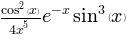

In [9]:
ans

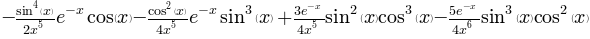

In [10]:
ansprime = ans.diff(x)
ansprime

In [11]:
from sympy.utilities.lambdify import lambdify

In [12]:
a_lamb = lambdify((x), ansprime)
a_lamb(2.2)



In [59]:
#Traffic Problem!!

#initial conditions



Vmax = 80
L = 11
rhoMax = 250
nx = 51
dt = .001
dx = L/nx
nt = 0


x = numpy.linspace(0,L,nx)
rho0 = numpy.ones(nx)*10
rho0[10:20] = 50
#F = Vmax*rho*(1-((rho)/(rhoMax)))


#p(0,t) = 10
for n in range(nt):
    rho = rho0.copy()
    for i in range(1,nx):
        #rho0[1:] = rho[1:] - dt/dx*(Vmax*rho[1:]*(1-((rho[1:])/(rhoMax)))-Vmax*rho[0:-1]*(1-((rho[0:-1])/(rhoMax))))
        rho0[i] = rho[i] - dt/dx*(Vmax*rho[i]*(1-((rho[i])/(rhoMax)))-Vmax*rho[i-1]*(1-((rho[i-1])/(rhoMax))))
        rho0[0] = 10
print(rho)

print(rho.max())

V = Vmax*(1-(rho.max()/rhoMax))
print(V)

[ 10.          10.          10.          10.          10.          10.          10.
  10.          10.          10.          10.00000014  10.00000305
  10.00003274  10.00023398  10.00125098  10.00533929  10.01895682
  10.05761177  10.15306797  10.36138283  10.76813799  11.48591604
  12.64009317  14.34290034  16.66114479  19.58716499  23.02285774
  26.7823648   30.61236863  34.22352996  37.32507808  39.65688854
  41.01699087  41.28433555  40.43566887  38.55297881  35.81695041
  32.48403962  28.84962978  25.20480233  21.79679725  18.80197213
  16.31573869  14.35866563  12.89385511  11.84903065  11.13746508
  10.67400815  10.38490068  10.21194491  10.11259751]
41.2843355523
66.7890126233


$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = v \frac{\partial^2 u}{\partial x^2}$$

$$\frac{\partial p}{\partial t} + \frac{\partial F}{\partial x} = 0$$

This is combination of linear convection and diffusion. Discretize using the methods we have seen.

$$\frac{u_i^{n+1} - u_i^n}{\Delta t} + u_i^n \frac{u_i^n - u_{i-1}^n}{\Delta x} = v \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\Delta x^2}$$

$$\frac{p_i^{n+1} - p_i^n}{\Delta t} + \frac{F_i^n - F_{i-1}^n}{\Delta x} = 0$$

$$p_i^{n+1} =  p_i^n - \frac{\Delta t}{\Delta x} (F_i^n - F_{i-1}^n)$$

In [27]:
V = 22.222*(1-(249/rhoMax))
print(V)

0.08888800000000008


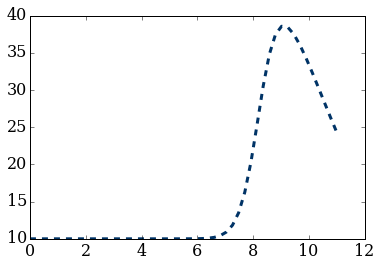

In [51]:
pyplot.plot(x,rho,color='#003366', ls='--',lw=3)
pyplot.ylim()
#Increased grid size from 41 to 100 to make the graph better